# Indian food analysis

Firstly please read docs.md

## Table of contents
* Data preparation
    * Load original dataset into dataframes
    * Data cleansing
    * Save dataset
    * Load cleansed dataset
* Analysis
    * Top 30 popular songs of all time
    * Analyze by a single song
    * Analyze track duration with frequency distribution chart
    * Analyze average track details by year

## Data preparation
### Load original dataset into dataframes

fonte: https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks

In [1]:
import numpy as np
import pandas as pd

# read dataset from csv
df_data_by_song : pd.DataFrame =   pd.read_csv('dataset/original/data.csv', index_col='name')
df_data_by_artist : pd.DataFrame = pd.read_csv('dataset/original/data_by_artist.csv', index_col='artists')
df_data_by_genres : pd.DataFrame = pd.read_csv('dataset/original/data_by_genres.csv', index_col='genres')
df_data_by_year : pd.DataFrame =   pd.read_csv('dataset/original/data_by_year.csv', index_col='year')
df_data_w_genres : pd.DataFrame =  pd.read_csv('dataset/original/data_w_genres.csv', index_col='artists')

In [2]:
# show dataset
print(f'data_by_song:\tPK: {df_data_by_song.index.name}\t{str(list(df_data_by_song.columns))}')
print(f'data_by_artist:\tPK: {df_data_by_artist.index.name}\t{str(list(df_data_by_artist.columns))}')
print(f'data_by_genres:\tPK: {df_data_by_genres.index.name}\t{str(list(df_data_by_genres.columns))}')
print(f'data_by_year:\tPK: {df_data_by_year.index.name}\t{str(list(df_data_by_year.columns))}')
print(f'data_w_genres:\tPK: {df_data_w_genres.index.name}\t{str(list(df_data_w_genres.columns))}')

data_by_song:	PK: name	['valence', 'year', 'acousticness', 'artists', 'danceability', 'duration_ms', 'energy', 'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity', 'release_date', 'speechiness', 'tempo']
data_by_artist:	PK: artists	['mode', 'count', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity', 'key']
data_by_genres:	PK: genres	['mode', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity', 'key']
data_by_year:	PK: year	['mode', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity', 'key']
data_w_genres:	PK: artists	['genres', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence',

### Data cleansing


In [3]:
# some fixes
df_data_by_song = df_data_by_song.drop(columns=['id'])
df_data_by_artist.index.name = 'artist'
df_data_by_genres.index.name = 'genre'
df_data_w_genres.index.name = 'artist'

In [4]:
# reorder columns
df_data_by_song = df_data_by_song[['popularity', 'danceability', 'valence', 'duration_ms', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'key', 'loudness', 'tempo', 'mode', 'speechiness', 'artists', 'year', 'explicit', 'release_date']]
df_data_by_artist = df_data_by_artist[['popularity', 'danceability', 'valence', 'duration_ms', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'key', 'loudness', 'tempo', 'mode', 'count']]
df_data_by_genres = df_data_by_genres[['popularity', 'danceability', 'valence', 'duration_ms', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'key', 'loudness', 'tempo', 'mode', 'speechiness']]
df_data_by_year = df_data_by_year[['popularity', 'danceability', 'valence', 'duration_ms', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'key', 'loudness', 'tempo', 'mode', 'speechiness']]
df_data_w_genres = df_data_w_genres[['popularity', 'danceability', 'valence', 'duration_ms', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'key', 'loudness', 'tempo', 'mode', 'speechiness', 'count', 'genres']]

### Savedataset

In [6]:
df_data_by_song.to_csv('dataset/cleansed/data_by_song.csv')
df_data_by_artist.to_csv('dataset/cleansed/data_by_artist.csv')
df_data_by_genres.to_csv('dataset/cleansed/data_by_genres.csv')
df_data_by_year.to_csv('dataset/cleansed/data_by_year.csv')
df_data_w_genres.to_csv('dataset/cleansed/data_w_genres.csv')

### Load cleansed dataset

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df_data_by_song : pd.DataFrame =   pd.read_csv('dataset/cleansed/data_by_song.csv', index_col='name')
df_data_by_artist : pd.DataFrame = pd.read_csv('dataset/cleansed/data_by_artist.csv', index_col='artist')
df_data_by_genres : pd.DataFrame = pd.read_csv('dataset/cleansed/data_by_genres.csv', index_col='genre')
df_data_by_year : pd.DataFrame =   pd.read_csv('dataset/cleansed/data_by_year.csv', index_col='year')
df_data_w_genres : pd.DataFrame =  pd.read_csv('dataset/cleansed/data_w_genres.csv', index_col='artist')

## Analysis
### Top 30 popular songs of all time
you can choose by and ascending or dicending

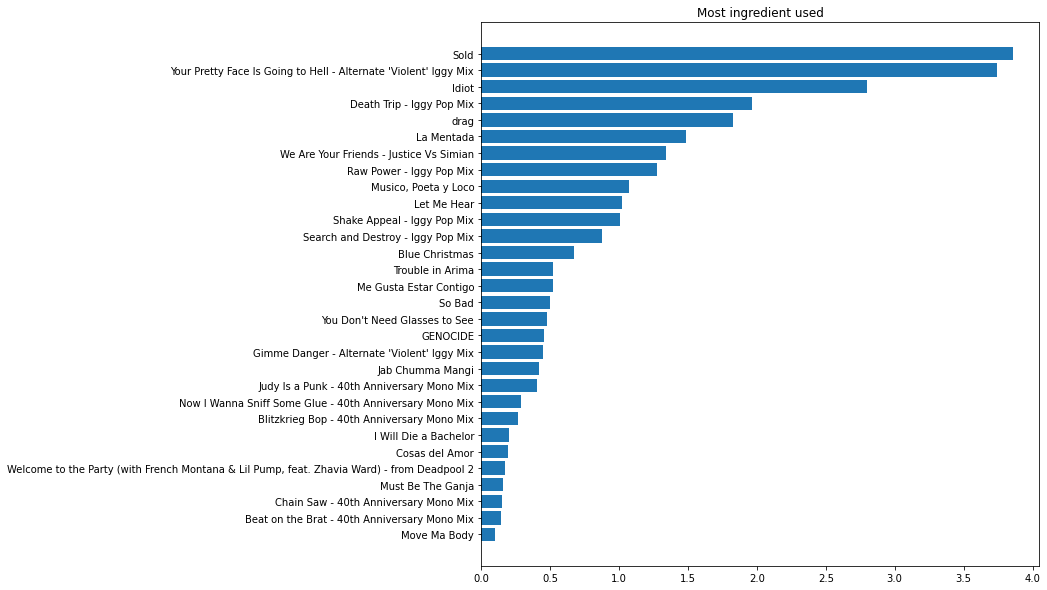

In [8]:
by = 'loudness' # choices: popularity duration_ms key loudness tempo year
ascending = False

import matplotlib.pyplot as plt

df_data_by_song_tops = df_data_by_song.sort_values(by=by, ascending=ascending).head(30)

fig, ax = plt.subplots(figsize=(10, 10))
ax.barh(list(df_data_by_song_tops.index.values), df_data_by_song_tops[by])
ax.invert_yaxis()
plt.title('Most ingredient used')
plt.show()

### Analyze by a single song
you can choose song_name

Release date: 1976

Artists: 

name: Matia Bazar
popularity              43.000000
danceability             0.644500
valence                  0.642000
duration_ms         229809.000000
energy                   0.576000
acousticness             0.186500
instrumentalness         0.002713
liveness                 0.161600
key                      6.000000
loudness               -13.872500
tempo                  119.247000
mode                     0.000000
count                    4.000000

track details:


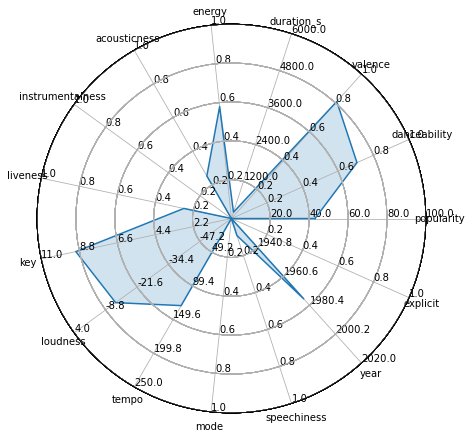

In [9]:
song_name = 'Stasera... Che Sera! - 1991 - Remaster;'

import matplotlib.pyplot as plt
from lib.complexRadar import ComplexRadar

if song_name not in df_data_by_song.index:
    raise IndexError('Song doesn\'t exist')

song = df_data_by_song.loc[song_name]

if isinstance(song, pd.DataFrame): #if multiple song with same name, song is a Dataframe, so I have to save only the first row as pd.Series
    song = song.iloc[0]

# duration milliseconds to seconds
song = song.rename({'duration_ms' : 'duration_s'})
song['duration_s'] = song['duration_s'] / 1000

# print release date
print('Release date: ' + song['release_date'])
print()

# print artists details
import ast
print('Artists: ')
print()
for artist in ast.literal_eval(song['artists']):
    print('name: ' + artist)
    if artist in df_data_by_artist.index:
        print(df_data_by_artist.loc[artist].to_string())
    print()

# print track details
print('track details:')
song: pd.Series = song.drop(index=['artists', 'release_date'])

variables = list(song.index)
data = list(song.values)
ranges = [(0, 100), (0, 1), (0, 1), (0, 6000),   # popularity danceability valence duration_s
        (0, 1), (0, 1), (0, 1), (0, 1),          # energy acousticness instrumentalness liveness
        (0, 11), (-60, 4), (-1, 250), (0, 1),    # key loudness tempo mode
        (0, 1), (1921, 2020), (0, 1)]            # speechiness year explicit

# plotting
fig = plt.figure(figsize=(6, 6))
radar = ComplexRadar(fig, variables, ranges)
radar.plot(data)
radar.fill(data, alpha=0.2)
plt.show()


### Analyze track duration with frequency distribution chart

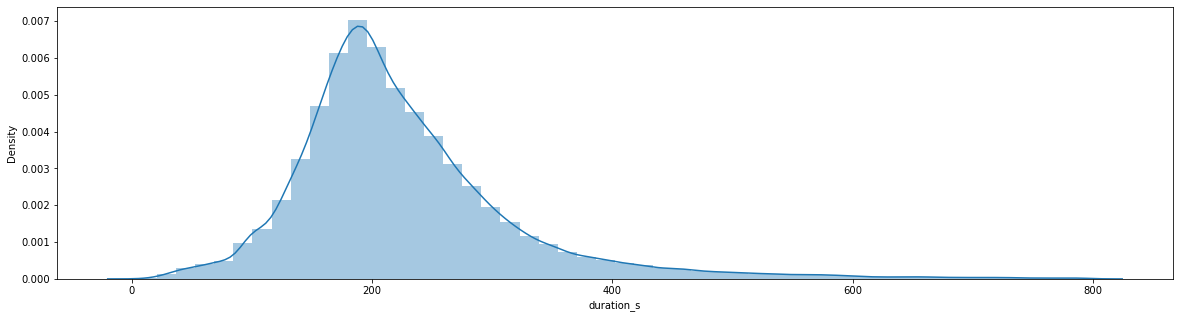

In [10]:
X = df_data_by_song.rename(columns={'duration_ms' : 'duration_s'})
X=X['duration_s'].loc[X['duration_s'] < 800000] / 10**3

# plotting
plt.figure(figsize=(20, 5))
sns.distplot(X)
plt.show()

### Analyze average track details by year
you can choose by which detail

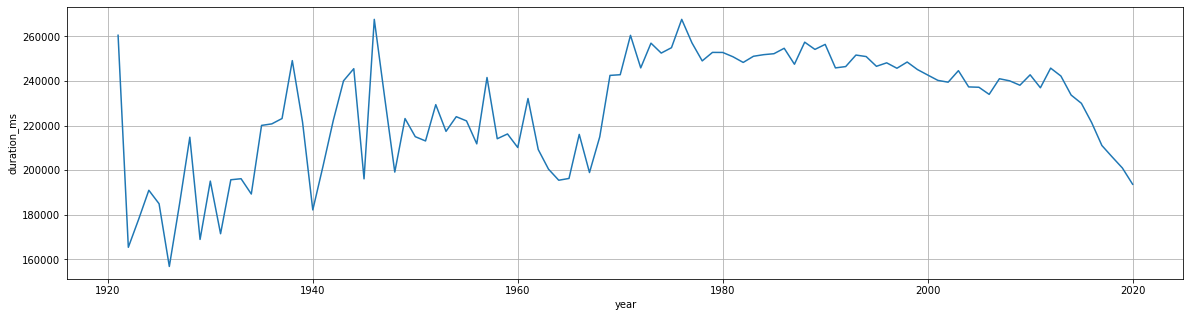

In [15]:
by = 'duration_ms' #choices: popularity, duration_ms, key, loudness, tempo

df_data_by_song : pd.DataFrame = df_data_by_song 
data = df_data_by_song[[by, 'year']].groupby(by='year').mean()
X = data.index
Y = data[by].values

# plotting
fig, ax = plt.subplots()
ax.plot(X, Y)
ax.grid()
ax.set_xlabel('year')
ax.set_ylabel(by)
fig.set_size_inches(20, 5)
fig.show()